In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#In order to run all data files in each of our individual laptops, we must make sure the filing system is the same for everyone.
# Make sure your data files are all located in the My Drive and have the same file name as below.
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Additional Data Cleaning and Feature Selection START HERE

In [0]:
#open finalnba data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1CWJ3ztysXu_2hFdrqNl1SfsPAkjl8lXycnmzmlQRRMo/edit')
sheet_one = wb.worksheet('finalnba')
data = sheet_one.get_all_values()
finalnba = pd.DataFrame(data)
finalnba.columns = finalnba.iloc[0]
finalnba = finalnba.iloc[1:]
finalnba.replace('', 0, inplace = True)
finalnba['Award'].replace('None', 0, inplace = True)
finalnba['Award'].replace('First', 1, inplace = True)
finalnba['Award'].replace('Second', 2, inplace = True)
finalnba['Award'].replace('Third', 3, inplace = True)
finalnba

,,Player,Pos,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,StartYear,PER,Award
1,0,Quincy Acy,PF,25,59,29,14.8,0.556,0.388,0.606,0.6,0.735,1.1,2.1,0.5,0.5,0.4,0.5,1.7,5.2,2015,14.7,0
2,1,Jordan Adams,SG,21,2,0,7.5,0.333,0,0.4,0.333,0.6,0,1,1.5,1.5,0,1,1,3.5,2015,17.3,0
3,2,Steven Adams,C,22,80,80,25.2,0.613,0,0.613,0.613,0.582,2.7,3.9,0.8,0.5,1.1,1.1,2.8,8,2015,15.5,0
4,3,Arron Afflalo,SG,30,71,57,33.4,0.443,0.382,0.469,0.5,0.84,0.3,3.4,2,0.4,0.1,1.2,2,12.8,2015,10.9,0
5,4,Alexis Ajinça,C,27,59,17,14.6,0.476,0,0.478,0.476,0.839,1.3,3.3,0.5,0.3,0.6,0.9,2.3,6,2015,13.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,525,Jonas Valančiūnas,C,26,49,27,22.3,0.559,0.292,0.586,0.572,0.795,2.2,6.4,1.4,0.4,1.1,1.8,3,15.6,2018,24.4,0
2029,526,Christian Wood,PF,23,21,2,12,0.521,0.346,0.571,0.56,0.732,0.8,3.1,0.4,0.3,0.5,0.8,0.8,8.2,2018,21.9,0
2030,527,Delon Wright,PG,26,75,13,22.7,0.434,0.298,0.492,0.478,0.793,0.9,2.6,3.3,1.2,0.4,1,1.4,8.7,2018,15.5,0
2031,528,Tyler Zeller,C,29,6,1,15.5,0.533,0,0.552,0.533,0.778,1.8,2.2,0.7,0.2,0.5,0.7,3.3,7.7,2018,17.3,0


In [0]:
# change dtypes
finalnba.Age = pd.to_numeric(finalnba['Age'])
finalnba.G = pd.to_numeric(finalnba['G'])
finalnba.GS = pd.to_numeric(finalnba['GS'])
finalnba.MP = pd.to_numeric(finalnba['MP'])
finalnba.PER = pd.to_numeric(finalnba['PER'])
finalnba.PTS = pd.to_numeric(finalnba['PTS'])
finalnba.PF = pd.to_numeric(finalnba['PF'])
finalnba.TOV = pd.to_numeric(finalnba['TOV'])
finalnba.BLK = pd.to_numeric(finalnba['BLK'])
finalnba.STL = pd.to_numeric(finalnba['STL'])
finalnba.AST = pd.to_numeric(finalnba['AST'])
finalnba.ORB = pd.to_numeric(finalnba['ORB'])
finalnba.DRB = pd.to_numeric(finalnba['DRB'])
finalnba.Award = pd.to_numeric(finalnba['Award'])
finalnba['FG%'] = finalnba['FG%'].astype(float)
finalnba['FT%'] = finalnba['FT%'].astype(float)
finalnba['eFG%'] = finalnba['eFG%'].astype(float)
finalnba['2P%'] = finalnba['2P%'].astype(float)
finalnba['3P%'] = finalnba['3P%'].astype(float)

In [0]:
#open nba2019 data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VmyZ7yTqHdk8EmzD9dUcbalFBZXoNBiqF6GuEZdrVh4/edit#gid=0').sheet1
data = wb.get_all_values()
nba2019 = pd.DataFrame(data)
nba2019.columns = nba2019.iloc[0]
nba2019 = nba2019.iloc[1:]
nba2019.replace('', 0, inplace = True)
nba2019


,,Player,Pos,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,StartYear,PER
1,0,Steven Adams,C,26,58,58,27,0.591,0.333,0.593,0.593,0.59,3.4,6,2.4,0.9,1.1,1.5,1.9,10.9,2019,20.8
2,1,Bam Adebayo,PF,22,65,65,34.4,0.567,0.077,0.576,0.568,0.69,2.5,8,5.1,1.2,1.3,2.8,2.5,16.2,2019,20.6
3,2,LaMarcus Aldridge,C,34,53,53,33.1,0.493,0.389,0.519,0.532,0.827,1.9,5.5,2.4,0.7,1.6,1.4,2.4,18.9,2019,19.8
4,3,Nickeil Alexander-Walker,SG,21,41,0,12.2,0.339,0.342,0.336,0.427,0.607,0.2,1.8,1.8,0.3,0.2,1,1.1,5.1,2019,7.6
5,4,Grayson Allen,SG,24,30,0,16.6,0.449,0.363,0.541,0.543,0.857,0.2,2,1.4,0.2,0,0.8,1.2,7.4,2019,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,509,Noah Vonleh,C-PF,24,33,1,11,0.562,0.2,0.635,0.579,0.8,1.1,2.6,0.8,0.3,0.2,0.6,1.2,3.8,2019,15.6
511,510,Derrick Walton,PG,24,26,1,9.5,0.462,0.417,0.533,0.59,0.778,0.1,0.5,1,0.3,0,0.2,0.8,2,2019,8.7
512,511,Paul Watson,SF-SG,25,5,0,5,0,0,0,0,0.5,0,0.8,1,0.2,0.2,0,0.2,0.2,2019,-0.5
513,512,Andrew Wiggins,SF-SG,24,54,54,34.4,0.447,0.332,0.506,0.504,0.709,1.2,3.9,3.7,0.8,1,2.4,2.4,21.8,2019,16.4


In [0]:
# change dtypes
nba2019.Age = pd.to_numeric(nba2019['Age'])
nba2019.G = pd.to_numeric(nba2019['G'])
nba2019.GS = pd.to_numeric(nba2019['GS'])
nba2019.MP = pd.to_numeric(nba2019['MP'])
nba2019.PER = pd.to_numeric(nba2019['PER'])
nba2019.PTS = pd.to_numeric(nba2019['PTS'])
nba2019.PF = pd.to_numeric(nba2019['PF'])
nba2019.TOV = pd.to_numeric(nba2019['TOV'])
nba2019.BLK = pd.to_numeric(nba2019['BLK'])
nba2019.STL = pd.to_numeric(nba2019['STL'])
nba2019.AST = pd.to_numeric(nba2019['AST'])
nba2019.ORB = pd.to_numeric(nba2019['ORB'])
nba2019.DRB = pd.to_numeric(nba2019['DRB'])
nba2019['FG%'] = nba2019['FG%'].astype(float)
nba2019['FT%'] = nba2019['FT%'].astype(float)
nba2019['eFG%'] = nba2019['eFG%'].astype(float)
nba2019['2P%'] = nba2019['2P%'].astype(float)
nba2019['3P%'] = nba2019['3P%'].astype(float)

**FEATURE SELECTION (Univariate Selection)**

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = finalnba.iloc[:, 3:20].astype(int)
y = finalnba['Award'].astype(int)

best_features = SelectKBest(score_func=chi2, k=17)
fit = best_features.fit(X, y)
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([feature_columns, feature_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(17, 'Score'))

   Feature        Score
2       GS  6468.378429
16     PTS  1974.792131
3       MP   720.851783
1        G   647.504917
11     AST   573.961203
10     DRB   362.443211
14     TOV   340.259330
12     STL   148.178669
13     BLK    85.718588
9      ORB    42.407476
15      PF    21.736544
8      FT%     1.855984
0      Age     1.542694
6      2P%     0.395538
5      3P%     0.365112
7     eFG%     0.273834
4      FG%     0.243408


**FEATURE SELECTION (Feature Importance)**

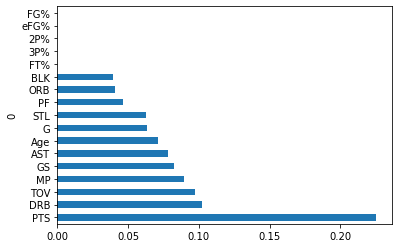

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(17).plot(kind='barh');

**FINAL FEATURE SELECTION**

While there is lots of overlap in the 10 best features selected between univariate selection and feature importance, intuitively, the features selected via univariate selection seem to be better features to select. When it comes to NBA Awards voting, it doesn't seem that age would be a bigger factor than more performance-related statistics such as STL (steals). So, we select 10 features via univariate selection that we would like to use in our analysis/model construction:

GS, PTS, MP, G, AST, DRB, TOV, STL, BLK, ORB

In [0]:
finalnba = finalnba[['Player', 'Pos', 'GS', 'PTS', 'MP', 'G', 'AST', 'DRB', 'TOV', 'STL', 'BLK', 'ORB', 'Award']]
finalnba.head()

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,Award
1,Quincy Acy,PF,29,5.2,14.8,59,0.5,2.1,0.5,0.5,0.4,1.1,0
2,Jordan Adams,SG,0,3.5,7.5,2,1.5,1.0,1.0,1.5,0.0,0.0,0
3,Steven Adams,C,80,8.0,25.2,80,0.8,3.9,1.1,0.5,1.1,2.7,0
4,Arron Afflalo,SG,57,12.8,33.4,71,2.0,3.4,1.2,0.4,0.1,0.3,0
5,Alexis Ajinça,C,17,6.0,14.6,59,0.5,3.3,0.9,0.3,0.6,1.3,0


In [0]:
summary=finalnba.groupby('Award')
summary.mean()

,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB
Award,,,,,,,,,,
0,22.681542,7.907911,19.175558,50.684077,1.739604,2.602028,1.041582,0.604564,0.375456,0.808824
1,75.850000,26.870000,35.205000,75.850000,6.145000,6.785000,3.385000,1.490000,0.960000,1.460000
2,73.350000,24.045000,34.260000,73.350000,5.430000,6.245000,2.895000,1.225000,1.020000,1.500000
3,74.400000,21.450000,34.470000,74.500000,4.825000,6.075000,2.575000,1.455000,0.785000,1.620000


<Figure size 14400x14400 with 0 Axes>

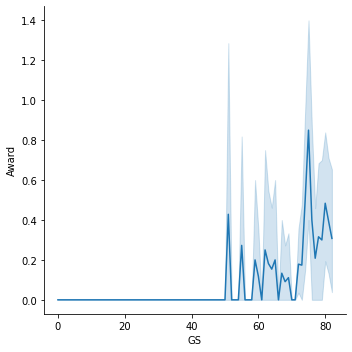

In [0]:
plt.figure(figsize=(200,200))
sns.relplot(x="GS", y="Award",kind='line',data=finalnba)

<Figure size 14400x14400 with 0 Axes>

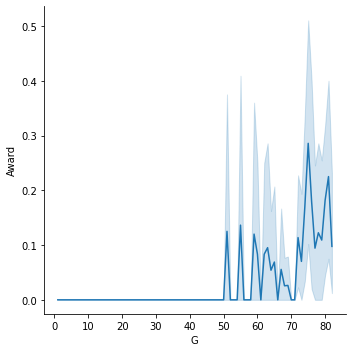

In [0]:
plt.figure(figsize=(200,200))
sns.relplot(x="G", y="Award",kind='line',data=finalnba)

<Figure size 14400x14400 with 0 Axes>

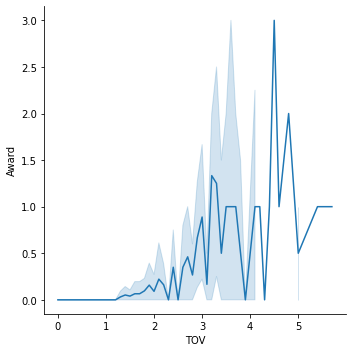

In [0]:
plt.figure(figsize=(200,200))
sns.relplot(x="TOV", y="Award",kind='line',data=finalnba)

<Figure size 14400x14400 with 0 Axes>

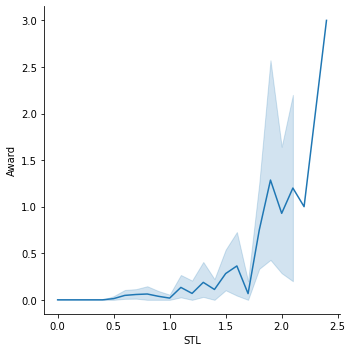

In [0]:
plt.figure(figsize=(200,200))
sns.relplot(x="STL", y="Award",kind='line',data=finalnba)

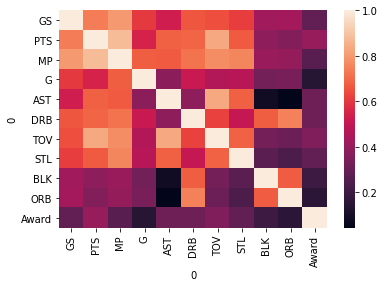

In [0]:
sns.heatmap(finalnba[['Player', 'Pos', 'GS', 'PTS', 'MP', 'G', 'AST', 'DRB', 'TOV', 'STL', 'BLK', 'ORB', 'Award']].corr())

In [0]:
nba2019 = nba2019[['Player', 'Pos', 'GS', 'PTS', 'MP', 'G', 'AST', 'DRB', 'TOV', 'STL', 'BLK', 'ORB']]
nba2019.head()

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB
1,Steven Adams,C,58,10.9,27.0,58,2.4,6.0,1.5,0.9,1.1,3.4
2,Bam Adebayo,PF,65,16.2,34.4,65,5.1,8.0,2.8,1.2,1.3,2.5
3,LaMarcus Aldridge,C,53,18.9,33.1,53,2.4,5.5,1.4,0.7,1.6,1.9
4,Nickeil Alexander-Walker,SG,0,5.1,12.2,41,1.8,1.8,1.0,0.3,0.2,0.2
5,Grayson Allen,SG,0,7.4,16.6,30,1.4,2.0,0.8,0.2,0.0,0.2


### Analysis START HERE

Linear Regression Model

In [0]:
# Part 1. Use Linear Regression to train model, where 1 = 3rd all nba, 2 = 2nd all nba, 3 = 1st all nba. For linear regression, we will see 
# each number in our predictive y value as ranked and see how accurate it is.
from sklearn.model_selection import train_test_split
random_state = 100
linfinalnba = finalnba.copy()
linfinalnba['Award'].replace(1,3, inplace = True)
linfinalnba['Award'].replace(3,1, inplace = True)
x = linfinalnba.iloc[:,2:12]
y = linfinalnba['Award']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = random_state)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 1625
Number of samples in validation data: 407


In [0]:
from sklearn import linear_model
# Create linear regression object
linReg_model = linear_model.LinearRegression()
linReg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Pretty bad model.
#Report training and test accuracy
training_accuracy= linReg_model.score(x_train, y_train)
print ('Training Accuracy:',training_accuracy)

test_accuracy= linReg_model.score(x_test, y_test)
print ('Testing Accuracy:',test_accuracy)

Training Accuracy: 0.31468548383875067
Testing Accuracy: 0.11988714262595301


In [0]:
x = nba2019.iloc[:, 2:12]
finalnbalin = nba2019
array = linReg_model.predict(x)
finalnbalin['award'] = array

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
finalnbalin = finalnbalin.sort_values(by =['award'], ascending = False)
finalnbalin.head(20)

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,award
12,Giannis Antetokounmpo,PF,57,29.6,30.9,57,5.8,11.5,3.7,1.0,1.0,2.3,0.837365
165,James Harden,SG,61,34.4,36.7,61,7.4,5.3,4.5,1.7,0.9,1.0,0.785719
109,Luka Dončić,PG,54,28.7,33.3,54,8.7,8.0,4.2,1.1,0.2,1.3,0.710959
212,LeBron James,PG,60,25.7,34.9,60,10.6,6.9,4.0,1.2,0.5,1.0,0.673502
252,Kawhi Leonard,SF,51,26.9,32.2,51,5.0,6.3,2.7,1.8,0.6,1.0,0.669161
100,Anthony Davis,PF,55,26.7,34.3,55,3.1,7.1,2.5,1.5,2.4,2.3,0.635680
204,Kyrie Irving,PG,20,27.4,32.9,20,6.4,4.1,2.6,1.4,0.5,1.1,0.607881
255,Damian Lillard,PG,58,28.9,36.9,58,7.8,3.8,2.9,1.0,0.4,0.5,0.590654
457,Trae Young,PG,60,29.6,35.3,60,9.3,3.7,4.8,1.1,0.1,0.5,0.562317
31,Bradley Beal,SG,57,30.5,36.0,57,6.1,3.3,3.4,1.2,0.4,0.9,0.551319


MVP Nominees (in order): Giannis Antetokounmpo, James Harden, Luka Doncic

All NBA First Team: Luka Doncic, James Harden, Giannis Antetokounmpo, Kawhi Leonard, Karl-Anthony Towns

All NBA Second Team: Lebron James, Kyrie Irving, Jayson Tatum, Anthony Davis, Joel Embiid

All NBA Third Team: Damian Lillard, Trae Young, Jimmy Butler, Paul George, Nikola Jokic

(Remember: Only 2 Guards, 2 Fowards, and 1 Center is allowed per ALL NBA TEAM)
Overall, not bad predictions using a simple linear regression model. But it looks like it doesn't take into account injuries much, because Kyrie Irving was still selected for second team despite only playing 20 games.


NOW LETS TRY LOGISTIC REGRESSION, where each value in Award gets its own classifier. 

In [0]:
# Create logistic regression object
logReg_model = linear_model.LogisticRegression(C= 1e-5)
x = finalnba.iloc[:,2:12]
y = finalnba['Award']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = random_state)
logReg_model.fit(x_train, y_train)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Report training and test accuracy
training_accuracy= logReg_model.score(x_train, y_train)
print ('Training Accuracy:',training_accuracy)

test_accuracy= logReg_model.score(x_test, y_test)
print ('Testing Accuracy:',test_accuracy)

Training Accuracy: 0.9667692307692307
Testing Accuracy: 0.9852579852579852


In [0]:
#Now try this on the nba 2019-2020 season to predict who will be in the all-team awards nomination.
xnine = nba2019.iloc[:,2:12]
array = logReg_model.predict_proba(xnine)
a = [i[0] for i in array] 
b = [i[1] for i in array]
c = [i[2] for i in array]
d = [i[3] for i in array]

In [0]:
nba2019log = nba2019
nba2019log['No_prob'] = a
nba2019log['First_prob']= b
nba2019log['Sec_prob'] = c
nba2019log['Third_prob'] = d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [0]:
firstteamlog = nba2019log.sort_values(by=['First_prob'], ascending = False)
firstteamlog.head(25)

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,award,No_prob,First_prob,Sec_prob,Third_prob
165,James Harden,SG,61,34.4,36.7,61,7.4,5.3,4.5,1.7,0.9,1.0,0.785719,0.927459,0.023013,0.024161,0.025368
222,Nikola Jokić,C,65,20.2,32.3,65,6.9,7.8,3.1,1.2,0.7,2.4,0.463717,0.929935,0.022096,0.023319,0.024650
170,Tobias Harris,PF,65,19.4,34.5,65,3.2,5.9,1.5,0.8,0.5,0.8,0.263011,0.930300,0.021962,0.023197,0.024541
388,Collin Sexton,SG,65,20.8,33.0,65,3.0,2.2,2.4,1.0,0.1,0.9,0.152688,0.930573,0.021884,0.023113,0.024431
46,Devin Booker,SG,62,26.1,36.1,62,6.6,3.7,3.9,0.7,0.3,0.4,0.347200,0.930870,0.021850,0.023023,0.024257
299,Donovan Mitchell,SG,63,24.2,34.4,63,4.2,3.7,2.7,1.0,0.2,0.7,0.322804,0.931246,0.021709,0.022893,0.024152
2,Bam Adebayo,PF,65,16.2,34.4,65,5.1,8.0,2.8,1.2,1.3,2.5,0.259958,0.931417,0.021590,0.022822,0.024171
457,Trae Young,PG,60,29.6,35.3,60,9.3,3.7,4.8,1.1,0.1,0.5,0.562317,0.932313,0.021433,0.022550,0.023703
363,Julius Randle,PF,64,19.5,32.5,64,3.1,7.4,3.0,0.8,0.3,2.4,0.197343,0.932471,0.021285,0.022475,0.023769
280,CJ McCollum,SG,62,22.5,36.0,62,4.3,3.4,1.9,0.7,0.6,0.7,0.278953,0.933229,0.021067,0.022235,0.023469


MVP Nominees : James Harden, Nikola Jokic, Tobias Harris

All NBA First Team: James Harden, Collin Sexton, Tobias Harris, Bam Adebayo, Nikola Jokic

All NBA Second Team: Devin Booker, Donovan Mitchell, Julius Randle, Bojan Bogdanovic, Domantas Sabonis

All NBA Third Team: Trae Young, CJ McCollum, Harrison Barnes, Demar DeRozan, Rudy Gobert

As you can see, logistic regression may be suffering from bias or overfitting, resulting in some weird selection. But, the predictions themselves were not too far off; most of these players on the list were still runner ups for all-star/awards and also play really well for their respected teams.

Random Forest Classifier

In [0]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)

#error
acc_rf=round(random_forest.score(x_train,y_train)*100,2)
print('Training Accuracy:', acc_rf)
acc_rf_test = round(random_forest.score(x_test,y_test)*100,2)
print('Testing Accuracy:', acc_rf_test)

Training Accuracy: 100.0
Testing Accuracy: 98.77


In [0]:
random_forest.predict_proba(xnine)

array([[0.998, 0.   , 0.001, 0.001],
       [0.771, 0.045, 0.16 , 0.024],
       [0.956, 0.028, 0.008, 0.008],
       ...,
       [1.   , 0.   , 0.   , 0.   ],
       [0.91 , 0.024, 0.014, 0.052],
       [1.   , 0.   , 0.   , 0.   ]])

In [0]:
new = nba2019.iloc[:,2:12]
array = random_forest.predict_proba(new)
a = [i[0] for i in array] 
b = [i[1] for i in array]
c = [i[2] for i in array]
d = [i[3] for i in array]

In [0]:
nba2019rf = nba2019
nba2019rf['No_prob'] = a
nba2019rf['First_prob']= b
nba2019rf['Sec_prob'] = c
nba2019rf['Third_prob'] = d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [0]:
teamrf = nba2019rf.sort_values(by=['First_prob'], ascending = False)
teamrf.head(27)

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,award,No_prob,First_prob,Sec_prob,Third_prob
165,James Harden,SG,61,34.4,36.7,61,7.4,5.3,4.5,1.7,0.9,1.0,0.785719,0.165,0.566,0.093,0.176
457,Trae Young,PG,60,29.6,35.3,60,9.3,3.7,4.8,1.1,0.1,0.5,0.562317,0.343,0.307,0.155,0.195
255,Damian Lillard,PG,58,28.9,36.9,58,7.8,3.8,2.9,1.0,0.4,0.5,0.590654,0.307,0.305,0.194,0.194
31,Bradley Beal,SG,57,30.5,36.0,57,6.1,3.3,3.4,1.2,0.4,0.9,0.551319,0.305,0.305,0.154,0.236
12,Giannis Antetokounmpo,PF,57,29.6,30.9,57,5.8,11.5,3.7,1.0,1.0,2.3,0.837365,0.341,0.302,0.146,0.211
440,Russell Westbrook,PG,53,27.5,35.9,53,7.0,6.3,4.5,1.7,0.3,1.8,0.515229,0.252,0.288,0.148,0.312
109,Luka Dončić,PG,54,28.7,33.3,54,8.7,8.0,4.2,1.1,0.2,1.3,0.710959,0.223,0.248,0.163,0.366
222,Nikola Jokić,C,65,20.2,32.3,65,6.9,7.8,3.1,1.2,0.7,2.4,0.463717,0.700,0.191,0.064,0.045
146,Rudy Gobert,C,62,15.1,34.5,62,1.5,10.3,1.9,0.8,2.0,3.4,0.184926,0.597,0.184,0.086,0.133
204,Kyrie Irving,PG,20,27.4,32.9,20,6.4,4.1,2.6,1.4,0.5,1.1,0.607881,0.318,0.178,0.186,0.318


MVP Nominees: James Harden, Giannis Antetokounmpo, Bradley Beal

All NBA First Team: James Harden, Bradley Beal, Giannis Antetokounmpo, Anthony Davis, Rudy Gobert

All NBA Second Team: Damian Lillard, Devin Booker, Kawhi Leonard, Bam Adebayo, Karl-Anthony Town

All NBA Third Team: Luka Doncic, Russell Westbrook, Pascal Siakam, Brandon Ingram, Hassan Whiteside

Random Forest was a lot better than logistic regression compared to real-world predictions. Nothing out of the ordinary, but it did highlight Bradley Beal as MVP. Still an amazing player this season, but may be overrated in our model because he plays on a terrible team

KNeighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=1, weights = 'distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acc_knn=round(knn.score(x_train,y_train)*100,2)
print('Training Accuracy:', acc_knn)
acc_knn_test=round(knn.score(x_test,y_test)*100,2)
print('Testing Accuracy:', acc_knn_test)

Training Accuracy: 100.0
Testing Accuracy: 98.53


In [0]:
x = nba2019.iloc[:, 2:12]
finalnbaproduct = nba2019
array = knn.predict(x)
finalnbaproduct['award'] = array


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
finalnbaproduct[finalnbaproduct['award'] != 0]

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,award,No_prob,First_prob,Sec_prob,Third_prob
31,Bradley Beal,SG,57,30.5,36.0,57,6.1,3.3,3.4,1.2,0.4,0.9,3,0.305,0.305,0.154,0.236
109,Luka Dončić,PG,54,28.7,33.3,54,8.7,8.0,4.2,1.1,0.2,1.3,3,0.223,0.248,0.163,0.366
245,Zach LaVine,SG,60,25.5,34.8,60,4.2,4.1,3.4,1.5,0.5,0.7,2,0.531,0.098,0.197,0.174
252,Kawhi Leonard,SF,51,26.9,32.2,51,5.0,6.3,2.7,1.8,0.6,1.0,3,0.335,0.129,0.220,0.316
255,Damian Lillard,PG,58,28.9,36.9,58,7.8,3.8,2.9,1.0,0.4,0.5,3,0.307,0.305,0.194,0.194
405,Jayson Tatum,PF,59,23.6,34.6,59,2.9,6.1,2.2,1.4,0.9,1.0,2,0.796,0.019,0.133,0.052
440,Russell Westbrook,PG,53,27.5,35.9,53,7.0,6.3,4.5,1.7,0.3,1.8,3,0.252,0.288,0.148,0.312


In [0]:
new = nba2019.iloc[:,2:12]
array = knn.predict_proba(new)
a = [i[0] for i in array] 
b = [i[1] for i in array]
c = [i[2] for i in array]
d = [i[3] for i in array]

In [0]:
nba2019knn = nba2019
nba2019knn['No_prob'] = a
nba2019knn['First_prob']= b
nba2019knn['Sec_prob'] = c
nba2019knn['Third_prob'] = d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [0]:
teamknn = nba2019knn.sort_values(by=['award'], ascending = False)
teamknn.head(10)

,Player,Pos,GS,PTS,MP,G,AST,DRB,TOV,STL,BLK,ORB,award,No_prob,First_prob,Sec_prob,Third_prob
440,Russell Westbrook,PG,53,27.5,35.9,53,7.0,6.3,4.5,1.7,0.3,1.8,3,0.0,0.0,0.0,1.0
255,Damian Lillard,PG,58,28.9,36.9,58,7.8,3.8,2.9,1.0,0.4,0.5,3,0.0,0.0,0.0,1.0
31,Bradley Beal,SG,57,30.5,36.0,57,6.1,3.3,3.4,1.2,0.4,0.9,3,0.0,0.0,0.0,1.0
252,Kawhi Leonard,SF,51,26.9,32.2,51,5.0,6.3,2.7,1.8,0.6,1.0,3,0.0,0.0,0.0,1.0
109,Luka Dončić,PG,54,28.7,33.3,54,8.7,8.0,4.2,1.1,0.2,1.3,3,0.0,0.0,0.0,1.0
405,Jayson Tatum,PF,59,23.6,34.6,59,2.9,6.1,2.2,1.4,0.9,1.0,2,0.0,0.0,1.0,0.0
245,Zach LaVine,SG,60,25.5,34.8,60,4.2,4.1,3.4,1.5,0.5,0.7,2,0.0,0.0,1.0,0.0
346,Elfrid Payton,PG,36,10.0,27.7,45,7.2,3.6,2.1,1.6,0.4,1.2,0,1.0,0.0,0.0,0.0
343,Patrick Patterson,PF,18,4.6,11.9,51,0.6,1.8,0.4,0.1,0.1,0.6,0,1.0,0.0,0.0,0.0
344,Justin Patton,C,0,1.8,4.8,5,0.4,0.8,0.4,0.0,0.0,0.2,0,1.0,0.0,0.0,0.0


MVP Nominees: Luka Doncic, James Harden, Kawhi Leonard

All NBA First Team: James Harden, Damian Lillard, Luka Doncic, Kawhi Leonard, 

All NBA Second Team: Russell Westbrook, Bradley Beal, Giannis Antetokounmpo, Jayson Tatum

All NBA Third Team: Zach Lavine

Problem with K Nearest Neighbor is that we did not have enough predictions for awards. Therefore, we just took the best probability of the ones we did have and ranked them. Overall, the selections were good (similar to random forest). Some interesting picks was Giannis for only second team and Kawhi for MVP given he sat out a lot of games with "loaded management"



Just by looking at the results, the best model to predict nba awards has to go to either Random Forest or Linear Regression. We can't really decide because a lot of it comes down to personal opinion, fan favorites, and media portrayal.  But overall the players selected for both models are all accurate in terms of real-world predictions and can be up for debate.

**VISUALIZATIONS**

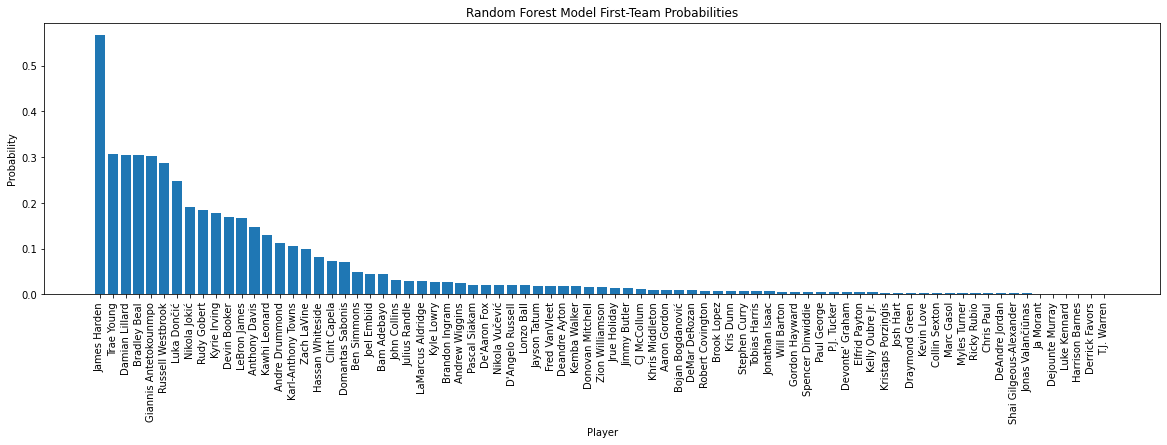

In [0]:
plt.figure(figsize=(20,5))

RF_viz = teamrf[teamrf['First_prob'] > 0]
plt.bar(RF_viz['Player'], RF_viz['First_prob'])
plt.title('Random Forest Model First-Team Probabilities')
plt.xlabel('Player')
plt.ylabel('Probability')
plt.xticks(rotation=90);

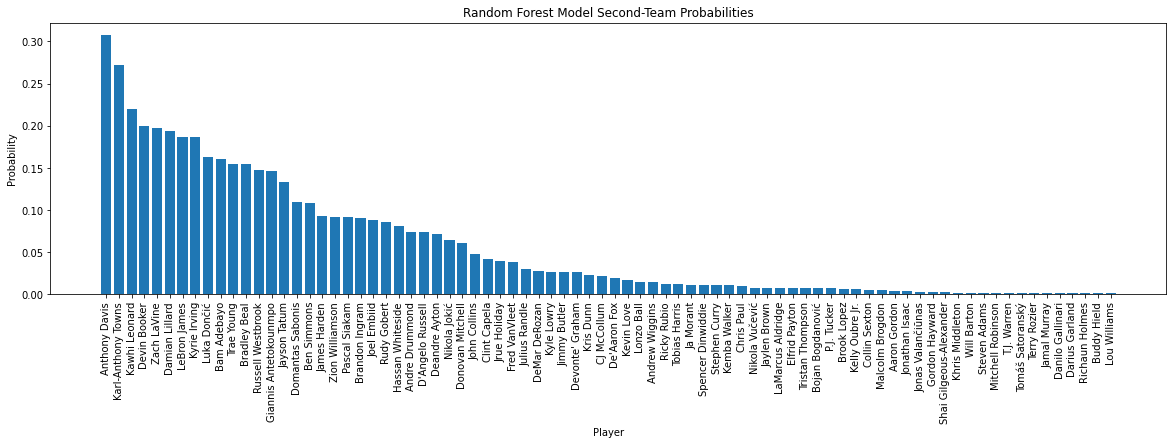

In [0]:
plt.figure(figsize=(20,5))

sec_teamrf = teamrf.sort_values(by = ['Sec_prob'], ascending=False)
RF_viz = sec_teamrf[sec_teamrf['Sec_prob'] > 0]

plt.bar(RF_viz['Player'], RF_viz['Sec_prob'])
plt.title('Random Forest Model Second-Team Probabilities')
plt.xlabel('Player')
plt.ylabel('Probability')
plt.xticks(rotation=90);

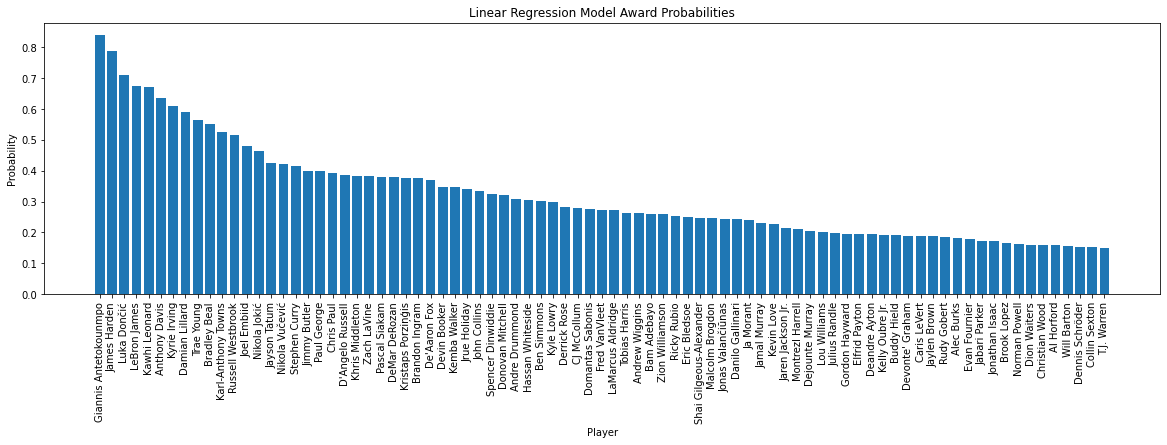

In [0]:
plt.figure(figsize=(20,5))

lin_viz = finalnbalin.sort_values(by=['award'], ascending=False)
lin_viz = lin_viz[lin_viz['award'] > 0.15]
plt.bar(lin_viz['Player'], lin_viz['award'])
plt.title('Linear Regression Model Award Probabilities')
plt.xlabel('Player')
plt.ylabel('Probability')
plt.xticks(rotation=90);